In [20]:
import geopandas
import pandas as pd
import glob
import datetime as dt
import re

In [ ]:
def read_data(type):
    csvfiles = glob.glob(f"data/data-{type}-*.geojson")

    dfs = []

    for file in csvfiles:
        df = geopandas.read_file(file)

        # Find the timestamp in the filename.
        df["timestamp"] = re.search("[0-9]{4}\-[0-9]{2}\-[0-9]{2}\_[0-9]{4}", file)[0]

        # Format the timestring so it can be converted to a timestamp.
        df["timestamp"] = df["timestamp"].apply(lambda x: x[:-2] + ':' + x[-2:])
        df["timestamp"] = df["timestamp"].str.replace("_", " ")

        # Convert to timestamp, then from UTC to EST (minus 4 hours).
        df["timestamp"] = pd.to_datetime(df["timestamp"]) - dt.timedelta(hours = 4)
        
        dfs.append(df)
        
    data = pd.concat(dfs)

    return data

## Shapes

In [25]:
shapes = read_data("shapes")

,OBJECTID,GlobalID,panneMajeure,idInterruption,Shape__Area,Shape__Length,geometry,timestamp
0,2899718,241f4ea2-a994-4b19-aef7-57532f411f81,1,LAV-I-18195-1,8.417532e+05,11061.622130,"POLYGON ((-76.65824 45.59690, -76.65841 45.596...",2023-04-06 10:59:00
1,2899719,dd9d67f1-6333-497c-8ec4-77291f037d25,1,LAV-I-18195-1,7.826897e+05,10868.220674,"POLYGON ((-76.57129 45.54161, -76.57156 45.541...",2023-04-06 10:59:00
2,2899720,e7597d45-0678-44e8-a7ba-7a6ca514a342,1,LAV-I-18195-1,1.171973e+05,1353.738910,"POLYGON ((-76.66318 45.57150, -76.66401 45.572...",2023-04-06 10:59:00
3,2899721,5ce36fc5-405d-47c1-86e3-0a95478ac17f,1,LAV-I-18195-1,3.001864e+04,621.359927,"POLYGON ((-76.65784 45.60850, -76.65775 45.608...",2023-04-06 10:59:00
4,2899722,5e0a58a7-7948-4bc6-92f0-75593a203f9c,1,LAV-I-18195-1,2.998392e+04,621.000436,"POLYGON ((-76.65167 45.57708, -76.65159 45.577...",2023-04-06 10:59:00
...,...,...,...,...,...,...,...,...
3995,2922635,ebcf9b91-5185-436b-a203-92c7f7bb6449,0,LAV-I-20267-1,5.834203e+04,1345.428057,"POLYGON ((-73.82688 45.57705, -73.82713 45.577...",2023-04-06 11:25:00
3996,2922636,a4618d7b-967a-443e-98dd-31c4f89940af,0,LAV-I-19427-1,9.844160e+04,1828.626461,"POLYGON ((-73.83701 45.57326, -73.83686 45.573...",2023-04-06 11:25:00
3997,2922637,8624f37d-fbc3-473f-8677-9cc527dc3ed8,0,LAV-I-20393-1,2.074664e+05,2216.420507,"POLYGON ((-73.82661 45.57941, -73.82726 45.579...",2023-04-06 11:25:00
3998,2922640,a0e31767-1e8d-4c3c-9c3b-1cf79668c173,1,NOR-I-15875-1,4.682997e+05,2976.445437,"POLYGON ((-73.92997 45.41994, -73.92927 45.419...",2023-04-06 11:25:00


## Points

In [23]:
csvfiles = glob.glob("data/data-points-*.geojson")

dfs = []

for file in csvfiles:
    df = geopandas.read_file(file)

    # Find the timestamp in the filename.
    df["timestamp"] = re.search("[0-9]{4}\-[0-9]{2}\-[0-9]{2}\_[0-9]{4}", file)[0]

    # Format the timestring so it can be converted to a timestamp.
    df["timestamp"] = df["timestamp"].apply(lambda x: x[:-2] + ':' + x[-2:])
    df["timestamp"] = df["timestamp"].str.replace("_", " ")

    # Convert to timestamp, then from UTC to EST (minus 4 hours).
    df["timestamp"] = pd.to_datetime(df["timestamp"]) - dt.timedelta(hours = 4)
    
    dfs.append(df)
    
points = pd.concat(dfs)

points

,OBJECTID,GlobalID,idInterruption,panneMajeure,geometry,timestamp
0,497654,5d1c47dc-1349-4a92-b8cd-075a8f8bd263,LAV-I-18472-1,1,POINT (-74.79422 45.66324),2023-04-06 10:59:00
1,497657,8f9c9311-698c-40fb-8c79-80cb9761b7a5,LAV-I-18195-1,1,POINT (-76.57370 45.57492),2023-04-06 10:59:00
2,497658,00225fe0-aab7-48ae-a438-6e8e7b46924f,LAV-I-18157-1,1,POINT (-75.48215 45.57836),2023-04-06 10:59:00
3,497665,0834d766-4b2c-47fa-9008-c283ac59d0eb,LAV-I-18089-1,1,POINT (-75.45042 45.55672),2023-04-06 10:59:00
4,497667,44b8383c-04e6-4555-a4f1-28dd760120ce,LAV-I-18429-1,1,POINT (-74.72894 45.71589),2023-04-06 10:59:00
...,...,...,...,...,...,...
2979,507756,74dc7a35-c11f-42a8-aa77-b7c9c3bb041b,NOR-I-16754-1,1,POINT (-73.48942 45.69413),2023-04-06 11:25:00
2980,507757,87bf94cc-c64d-413e-b20a-d75004a607cd,SEI-I-26401-1,1,POINT (-72.39110 46.08001),2023-04-06 11:25:00
2981,507758,bb49523f-8204-4761-a981-94e6309c83e5,SEI-I-27568-1,1,POINT (-73.18784 45.56525),2023-04-06 11:25:00
2982,507759,f493b8f1-755e-4042-8fcc-6bab08130d3e,SEI-I-27545-1,1,POINT (-73.42757 45.52397),2023-04-06 11:25:00


In [24]:
data[data["OBJECTID"] == 497654]

,OBJECTID,GlobalID,idInterruption,panneMajeure,geometry,timestamp
0,497654,5d1c47dc-1349-4a92-b8cd-075a8f8bd263,LAV-I-18472-1,1,POINT (-74.79422 45.66324),2023-04-06 10:59:00
0,497654,5d1c47dc-1349-4a92-b8cd-075a8f8bd263,LAV-I-18472-1,1,POINT (-74.79422 45.66324),2023-04-06 11:25:00


In [32]:
raw = geopandas.read_file('data\data-points-2023-04-06_1059.geojson')
raw = geopandas.GeoDataFrame(raw, geometry="geometry")

raw

,OBJECTID,GlobalID,idInterruption,panneMajeure,geometry
0,497654,5d1c47dc-1349-4a92-b8cd-075a8f8bd263,LAV-I-18472-1,1,POINT (-74.79422 45.66324)
1,497657,8f9c9311-698c-40fb-8c79-80cb9761b7a5,LAV-I-18195-1,1,POINT (-76.57370 45.57492)
2,497658,00225fe0-aab7-48ae-a438-6e8e7b46924f,LAV-I-18157-1,1,POINT (-75.48215 45.57836)
3,497665,0834d766-4b2c-47fa-9008-c283ac59d0eb,LAV-I-18089-1,1,POINT (-75.45042 45.55672)
4,497667,44b8383c-04e6-4555-a4f1-28dd760120ce,LAV-I-18429-1,1,POINT (-74.72894 45.71589)
...,...,...,...,...,...
2953,507473,f5c2adf3-7ca8-44ef-9758-020aa620000e,LAV-I-22355-1,1,POINT (-73.74046 45.81454)
2954,507474,bb18bfd2-6795-4ddc-8977-d14cc1423808,NOR-I-16652-1,1,POINT (-73.60627 45.57429)
2955,507476,34bb3764-64b1-4bff-8ace-a3a4c62a8529,NOR-I-16654-1,1,POINT (-73.76310 45.44085)
2956,507477,27be8110-aa26-4c19-8eb7-d8e2223b169f,LAV-I-22363-1,1,POINT (-73.83666 45.56153)


<AxesSubplot:>

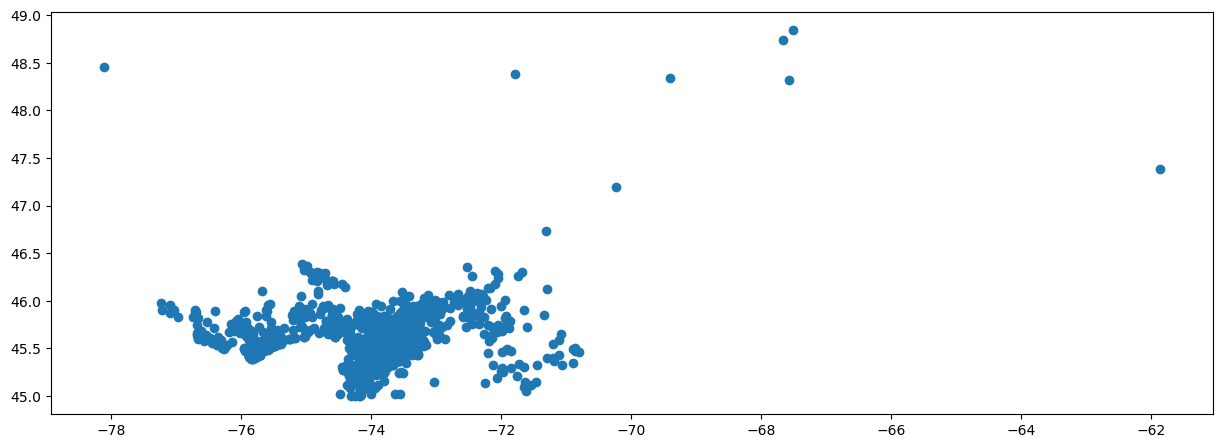

In [33]:
raw.set_crs("EPSG:4326").plot(figsize=(15,15))